<a href="https://colab.research.google.com/github/GastonArnaldoVega/Ticketera-Visa-Headset/blob/main/TicketeraVisaHeadset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Realizamos la carga de la documentación necesaria**


In [ ]:
# Se importa las librerias necesarias
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt


# Montamos Google Drive para acceder al archivo
drive.mount('/content/drive', force_remount=True)

#Creamos variante de donde se buscara el archivo
ruta_archivo = '/content/drive/MyDrive/Informes y Mejoras/TicketHeadsetVisa.csv'

# Realizamos la lectura del archivo por pandas
try:
  df = pd.read_csv(ruta_archivo, sep=None, engine='python')  # Se agrega la separacion y decimal
  print('Extracion de datos correcto')
except FileNotFoundError:
    print(f'El archivo {ruta_archivo} no fue encontrado')

Mounted at /content/drive
Extracion de datos correcto


## Se realiza limpieza de datos para el previo analisis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51541 entries, 0 to 51540
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        51541 non-null  int64         
 1   Cliente                   51541 non-null  object        
 2   Agente asignado           51541 non-null  object        
 3   Creador                   51541 non-null  object        
 4   Mesa de ayuda             51541 non-null  object        
 5   Estado                    51541 non-null  object        
 6   Categoría                 51541 non-null  object        
 7   Fecha de creación         51541 non-null  datetime64[ns]
 8   Descripción               51541 non-null  object        
 9   Descripción sin formato   51524 non-null  object        
 10  Colaboradores             51541 non-null  object        
 11  Cuenta                    37212 non-null  object        
 12  Comentario de reso

In [ ]:
df.head()

,ID,Cliente,Agente asignado,Creador,Mesa de ayuda,Estado,Categoría,Fecha de creación,Descripción,Descripción sin formato,Colaboradores,Cuenta,Comentario de resolución,Llegada
0,776519,Silvana Mariela Caballero,Facundo Villada,Silvana Mariela Caballero,ITField de RES,Cerrado,Tecnología (IT) > Servicio IT Mercados > Softw...,2025-11-04 16:32:00,"<table border=""1"" cellspacing=""0"" style=""borde...",\n\t\n\t\t\n\t\t\tFormulario - Soporte Técnico...,Facundo Villada,ARGENTINA->TELECOM->TELECOM SMB COMERCIAL,<p>Casilla de mail llena. Se borran algunos ms...,Llegada despues del recambio
1,778813,Gonzalo Damian Soto Gillard,Facundo Villada,ApexWay ApexWay,ITField de RES,Solucionado,Tecnología (IT) > Servicio IT Mercados > Softw...,2025-11-07 18:35:00,"<p>Estimado, Le solicito revision de incidente...","Estimado, Le solicito revision de incidente co...",Facundo Villada,ARGENTINA->PRISMA,<p>Se ha reportado lentitud en el inicio de la...,Llegada despues del recambio
2,778805,Silvana Luque,Facundo Villada,ApexWay ApexWay,ITField de RES,Solucionado,Tecnología (IT) > Servicio IT Mercados > Softw...,2025-11-07 18:25:00,"<p>Estimado, Le solicito revision de incidente...","Estimado, Le solicito revision de incidente co...",Facundo Villada,ARGENTINA->CABLEVISION RESISTENCIA,"<p>Buenas!</p>\n\n<p>Lamentablemente, en este ...",Llegada despues del recambio
3,778630,Blanca Aurora Ruiz Diaz,Facundo Villada,ApexWay ApexWay,ITField de RES,Solucionado,Tecnología (IT) > Servicio IT Mercados > Softw...,2025-11-07 15:35:00,"<p>Estimado, Le solicito revision de incidente...","Estimado, Le solicito revision de incidente co...",Facundo Villada,ARGENTINA->PRISMA,<p>Anteriormente se probó con un teclado dañad...,Llegada despues del recambio
4,778777,"Ayelen Varela Christener, Ayelen",,ApexWay ApexWay,ITField de RES,Nuevo,Tecnología (IT) > Servicio IT Mercados > Softw...,2025-11-07 18:02:00,"<p>Estimado, Le solicito revision de incidente...","Estimado, Le solicito revision de incidente co...",\t-,ARGENTINA->PRISMA,NaN,Llegada despues del recambio


In [ ]:
# Realizo un borrado de las columnas que no son necesarias para el trabajo a realizar
df.drop(columns=['Prioridad', 'Origen','Tipo','Colaborador','Tipo Colaborador','Cuenta Origen'], inplace=True)

# renombramos columnas
df.rename(columns={'Cuenta/Campaña':'Cuenta'}, inplace=True)

# Modificamos el tipo de columna fecha de creación a tipo datetime
df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación'], format='%d/%m/%Y, %H:%M', dayfirst=True)

# Crearemos una nueva tabla basada en fecha de creación donde se dividira en antes del recambio a luego del recambio la fecha a tomar sera 15 de Julio del 2025 (15/06/2025, 08:00)
def LLegadas_de_headset(fecha):
    if pd.isna(fecha):
        return pd.NA
    # Hacemos la division entre fechas de llegadas de headset
    recambio_date = pd.to_datetime('2025-07-15 08:00')
    if fecha < recambio_date:
        return 'Llegada antes del recambio'
    else:
        return 'Llegada despues del recambio'

df['Llegada'] = df['Fecha de creación'].apply(LLegadas_de_headset)

### Creamos el filtro necesario para ver los ticket de los IT de RES1  y eso macheamos con la llegada de los nuevos insumos y los cambios de realizados en la cuenta de VISA

In [ ]:
# Creo un filtro donde muestra los ticket que trabajo el IT para la cuenta VISA
filtro_IT_Cuenta_Visa = (
    df["Agente asignado"].isin([
        "Facundo Villada",
        "Gaston Arnaldo Vega",
        "Pablo Daniel Montenegro"
    ]) &
    (df["Cuenta"] == "ARGENTINA->PRISMA")
)

df_filtrado_Visa = df[filtro_IT_Cuenta_Visa]

# Buscamos las palabras claves 'cambio' y 'headset' en Comentario de resolución justo despues de la fecha de la llegada e los headset
df_resultado_Visa = df_filtrado_Visa[
    df_filtrado_Visa["Comentario de resolución"].str.contains("cambio.*headset|headset.*cambio|cambio.*insumo", case=False, na=False)
    &
    (df_filtrado_Visa["Llegada"] == "Llegada despues del recambio")
]

# Hacemos una tupla sobre el filtrado previo para ver la forma de la lista el total de cambios
total_Visa = df_resultado_Visa.shape[0]
# Aca hacemos un conteo sobre cada interaccion que tuvo cada individuo
por_agente = df_resultado_Visa["Agente asignado"].value_counts()

print("Total tickets con cambios de headset en la cuenta 'VISA':", total_Visa)
print("\nCambios por agente:\n", por_agente)


Total tickets con cambios de headset en la cuenta 'VISA': 183

Cambios por agente:
 Agente asignado
Gaston Arnaldo Vega        129
Facundo Villada             53
Pablo Daniel Montenegro      1
Name: count, dtype: int64


### Ahora hacemos lo mismo Pero para la cuenta de TECO

In [ ]:
# Creo un filtro donde muestra los ticket que trabajo el IT para la cuenta TECO
filtro_IT_Cuenta_TECO = (
    df["Agente asignado"].isin([
        "Facundo Villada",
        "Gaston Arnaldo Vega",
        "Pablo Daniel Montenegro"
    ]) &
   (df["Cuenta"].str.contains("ARGENTINA->TELECOM", case=False, na=False))
)

df_filtrado_TECO = df[filtro_IT_Cuenta_TECO]

# busco 'cambio' en Comentario de resolución junto que la llegada sea despues del recambio
df_resultado_TECO = df_filtrado_TECO[
    df_filtrado_TECO["Comentario de resolución"].str.contains("cambio.*headset|headset.*cambio|cambio.*insumo", case=False, na=False)
    &
    (df_filtrado_TECO["Llegada"] == "Llegada despues del recambio")
]

# total y desglose por agente
total_TECO = df_resultado_TECO.shape[0]
por_agente = df_resultado_TECO["Agente asignado"].value_counts()

print("Total tickets con cambios de headset en la cuenta 'TECO':", total_TECO)
print("\nCambios por agente:\n", por_agente)


Total tickets con cambios de headset en la cuenta 'TECO': 68

Cambios por agente:
 Agente asignado
Gaston Arnaldo Vega    55
Facundo Villada        13
Name: count, dtype: int64


# Finalizamos el analisis de los datos para demostrar la compracion

In [ ]:
# Creamos una variable para unificar la cantidad total de cada cuenta
conteo_total_de_cuentas = pd.Series({
    "VISA": df_resultado_Visa.shape[0],
    "TELECOM": df_resultado_TECO.shape[0]
})
print(conteo_total_de_cuentas)

VISA       183
TELECOM     68
dtype: int64


## Grafico de barras

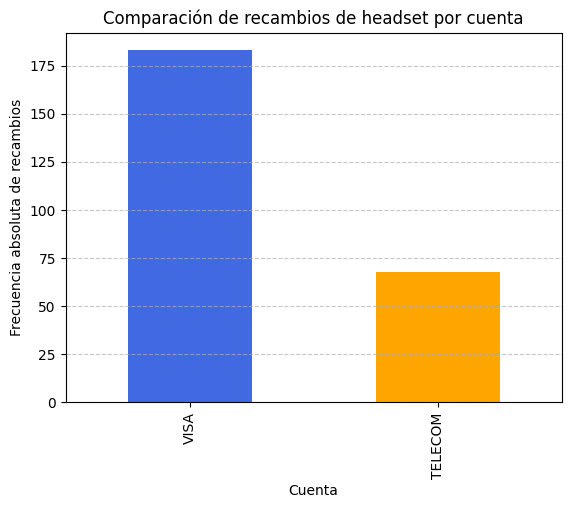

In [ ]:
# Creamos una variable para unificar la cantidad total de cada cuenta
conteo_total_de_cuentas = pd.Series({
    "VISA": df_resultado_Visa.shape[0],
    "TELECOM": df_resultado_TECO.shape[0]
})

# Demostramos la cantidad de recambos de headset por cuenta mediante un grafico de barra
conteo_total_de_cuentas.plot(kind="bar", color=["royalblue", "orange"])

plt.title("Comparación de recambios de headset por cuenta")
plt.xlabel("Cuenta")
plt.ylabel("Frecuencia absoluta de recambios")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Grafico de torta

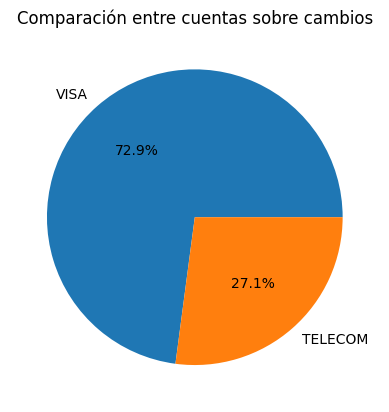

In [ ]:
# Se muestra en un grafico de torta la comparación entre las cuentas
conteo_total_de_cuentas.plot(kind='pie', autopct='%1.1f%%')
plt.title('Comparación entre cuentas sobre cambios')
plt.ylabel('')
plt.show()

## Grafico evolutivo de cambios de headset

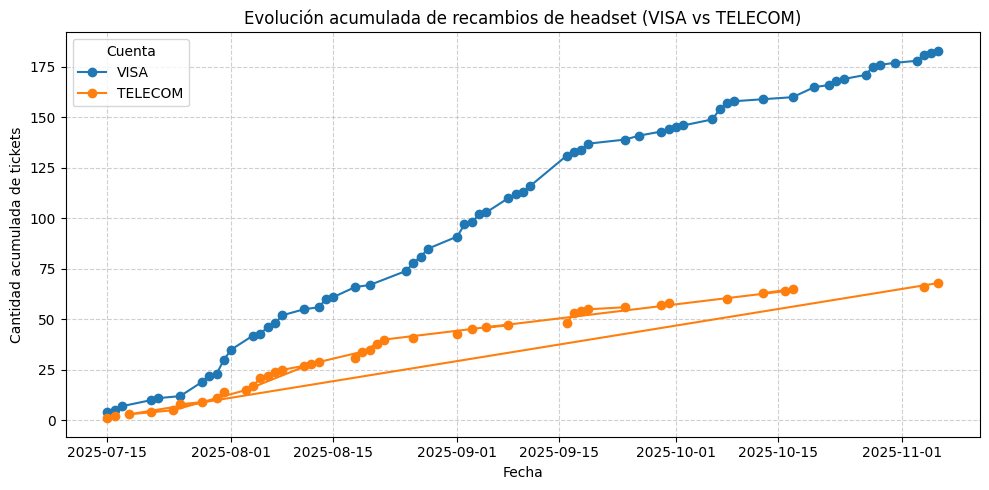

In [ ]:
# Agrupamos y acumulamos cada cuenta
df_visa_acum = (
    df_resultado_Visa.groupby(df_resultado_Visa["Fecha de creación"].dt.date)
    .size().sort_index().cumsum()
)
df_teco_acum = (
    df_resultado_TECO.groupby(df_resultado_TECO["Fecha de creación"].dt.date)
    .size().sort_index().cumsum()
)

# Unimos en un solo DataFrame
df_acum_comparacion = pd.concat([df_visa_acum, df_teco_acum], axis=1)
df_acum_comparacion.columns = ["VISA", "TELECOM"]

# Graficamos de forma comparativa entre ambos
df_acum_comparacion.plot(figsize=(10,5), marker='o')
plt.title("Evolución acumulada de recambios de headset (VISA vs TELECOM)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad acumulada de tickets")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Cuenta")
plt.tight_layout()
plt.show()


In [ ]:
# Definimos la ruta de salida para guardar el nuevo csv
ruta_salida ='/content/drive/MyDrive/Informes y Mejoras/Resultado_TECO.csv'

# Guardamos el DataFrame transformado en un nuevo archivo csv en drive
df_resultado_TECO.to_csv(ruta_salida, index=False, sep=',')
print(f'El archivo CSV guardado en: {ruta_salida}')

El archivo CSV guardado en: /content/drive/MyDrive/Informes y Mejoras/Resultado_TECO.csv
